In [1]:
import pandas as pd

In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

def load_fashion_mnist():
    """
    Loads Fashion MNIST dataset.
    
    Adapted from: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    """
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)
        train_labels = train_labels.reshape(-1, 1)
        test_labels = test_labels.reshape(-1, 1)
       
    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

def oh_load_fashion_mnist():
    """
    Loads Fashion MNIST dataset.
    
    Adapted from: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    """
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)
        train_labels = train_labels.reshape(-1, 1)
        test_labels = test_labels.reshape(-1, 1)
        OH_train = OneHotEncoder().fit_transform(train_labels).toarray()
        OH_test = OneHotEncoder().fit_transform(test_labels).toarray()

    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, OH_train, test_images, OH_test

In [3]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))

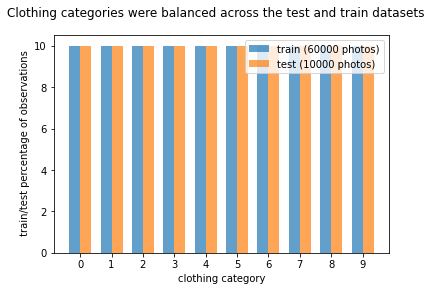

In [4]:
train_images, train_labels, test_images, test_labels = load_fashion_mnist()
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = ' train/test percentage of observations'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('clothing category')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Clothing categories were balanced across the test and train datasets')
plot_bar(train_labels, loc='left')
plot_bar(test_labels, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(train_labels)), 
    'test ({0} photos)'.format(len(test_labels))
]);

In [5]:
# dummy model 
unique, counts = np.unique(train_labels, return_counts=True)
counts # 6k for each category, 10 categories - 6k/60k for any category chosen 

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

## Dummy Model Results

the data in the test and train sets was evenly distributed across the 10 categories present in the data yielding a dummy accuracy of 10% as it would guess the same clothing category for each sample of data it was provided.


## Our model- creation 

In [12]:
# leave one out cross validation 
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import mean_squared_error

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
# skf.get_n_splits(None, None)
# train_images, train_labels, final_test_images, final_test_labels = load_fashion_mnist()



# # cols = {'actual': [], 'predictions': []}
# # error = pd.DataFrame(data=cols)


# for i, (train_index, test_index) in enumerate(skf.split(train_images, train_labels)):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
# #     clf.fit(train_images, train_labels)
#     predicted = clf.predict(test_images)
 
#     idx_1 = 0
#     for idx_0 in test_labels:
#         error.loc[len(error.index)] = [test_labels[idx_0], predicted[idx_1]]
#         idx_1+=1
    
# mse = mean_squared_error(error['actual'], error['predictions'])
    
    
    
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold.get_n_splits

#### first attempt 




In [10]:
# based on sci-kit learn example 
        #https://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html

train_images, train_labels, test_images, test_labels = oh_load_fashion_mnist()
    
from sklearn import datasets, svm, metrics
clf = svm.SVC() #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# single test train split
from sklearn.model_selection import train_test_split

# create a test and train dataset for base clf model #1 split, auto hyper parameters
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.20, random_state=42)

from sklearn import datasets, neighbors, linear_model

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print("KNN score: %f" % knn.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.837583


In [13]:
# using loocv and random forest classifier 
from sklearn.ensemble import RandomForestClassifier
train_images, train_labels, final_test_images, final_test_labels = load_fashion_mnist()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
skf.get_n_splits(None, None)
# train_images, train_labels, test_images, test_labels = load_fashion_mnist()

flag= 0
rf = RandomForestClassifier(warm_start=True,oob_score=True )

for i, (train_index, test_index) in enumerate(skf.split(train_images, train_labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}", len(train_index))
    print(f"  Test:  index={test_index}",  len(test_index))
    
    
    #train 
    subset_traini = [train_images[train_index[0]]]
    subset_trainl = [train_labels[train_index[0]]]
    for idx in train_index:
        subset_traini = np.append(subset_traini, [train_images[idx]], axis = 0)
        subset_trainl = np.append(subset_trainl, [train_labels[idx]], axis = 0)
    
    #test
    if flag == 0:
        test_image_all = [train_images[test_index[0]]]
        test_label_all = [train_labels[test_index[0]]]
        flag = 1
    if flag == 1: 
        subset_testi = [train_images[test_index[0]]]
        subset_testl = [train_labels[test_index[0]]]
        for idx in test_index:
            subset_testi = np.append(subset_testi, [train_images[idx]], axis = 0)
            subset_testl = np.append(subset_testl, [train_labels[idx]], axis = 0)
            test_image_all = np.append(test_image_all, [train_images[idx]], axis = 0)
            test_label_all = np.append(test_label_all, [train_labels[idx]], axis = 0)
        
        #choose model 
        rf.fit(subset_traini ,subset_trainl)

score = rf.score(test_image_all, test_label_all)
score

Fold 0:
  Train: index=[    0     1     3 ... 59994 59996 59997] 48000
  Test:  index=[    2     5     7 ... 59995 59998 59999] 12000


/tmp/ipykernel_492549/3668790194.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(subset_traini ,subset_trainl)


Fold 1:
  Train: index=[    0     1     2 ... 59997 59998 59999] 48000
  Test:  index=[    4     6     8 ... 59988 59989 59993] 12000


/tmp/ipykernel_492549/3668790194.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(subset_traini ,subset_trainl)
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:455: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Fold 2:
  Train: index=[    0     1     2 ... 59997 59998 59999] 48000
  Test:  index=[   11    13    20 ... 59972 59983 59996] 12000


/tmp/ipykernel_492549/3668790194.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(subset_traini ,subset_trainl)
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:455: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Fold 3:
  Train: index=[    2     3     4 ... 59996 59998 59999] 48000
  Test:  index=[    0     1    12 ... 59987 59990 59997] 12000


/tmp/ipykernel_492549/3668790194.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(subset_traini ,subset_trainl)
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:455: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Fold 4:
  Train: index=[    0     1     2 ... 59997 59998 59999] 48000
  Test:  index=[    3    14    18 ... 59985 59986 59994] 12000


/tmp/ipykernel_492549/3668790194.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(subset_traini ,subset_trainl)
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:455: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


0.976950384160264

In [ ]:
# using loocv 
train_images, train_labels, final_test_images, final_test_labels = load_fashion_mnist()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
skf.get_n_splits(None, None)
# train_images, train_labels, test_images, test_labels = load_fashion_mnist()
from sklearn import datasets, svm, metrics
clf = svm.SVC() #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

flag= 0

for i, (train_index, test_index) in enumerate(skf.split(train_images, train_labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}", len(train_index))
    print(f"  Test:  index={test_index}",  len(test_index))
    
    
    #train 
    subset_traini = [train_images[train_index[0]]]
    subset_trainl = [train_labels[train_index[0]]]
    for idx in train_index:
        subset_traini = np.append(subset_traini, [train_images[idx]], axis = 0)
        subset_trainl = np.append(subset_trainl, [train_labels[idx]], axis = 0)
    
    #test
    if flag == 0:
        test_image_all = [train_images[test_index[0]]]
        test_label_all = [train_labels[test_index[0]]]
        flag = 1
    if flag == 1: 
        subset_testi = [train_images[test_index[0]]]
        subset_testl = [train_labels[test_index[0]]]
        for idx in test_index:
            subset_testi = np.append(subset_testi, [train_images[idx]], axis = 0)
            subset_testl = np.append(subset_testl, [train_labels[idx]], axis = 0)
            test_image_all = np.append(test_image_all, [train_images[idx]], axis = 0)
            test_label_all = np.append(test_label_all, [train_labels[idx]], axis = 0)
        
        knn = neighbors.KNeighborsClassifier()
        # logistic = linear_model.LogisticRegression(max_iter=1000)

        # print("KNN score: %f" % knn.fit(subset_traini ,subset_trainl).score(subset_testi, subset_testl))
        knn.fit(subset_traini ,subset_trainl)
        

score = knn.score(test_image_all, test_label_all)
score #mean accuracy 

In [ ]:
# using loocv and random forest classifier 
from sklearn.ensemble import RandomForestClassifier
train_images, train_labels, final_test_images, final_test_labels = load_fashion_mnist()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
skf.get_n_splits(None, None)
# train_images, train_labels, test_images, test_labels = load_fashion_mnist()

flag= 0
clf = RandomForestClassifier(warm_start=True)

for i, (train_index, test_index) in enumerate(skf.split(train_images, train_labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}", len(train_index))
    print(f"  Test:  index={test_index}",  len(test_index))
    
    
    #train 
    subset_traini = [train_images[train_index[0]]]
    subset_trainl = [train_labels[train_index[0]]]
    for idx in train_index:
        subset_traini = np.append(subset_traini, [train_images[idx]], axis = 0)
        subset_trainl = np.append(subset_trainl, [train_labels[idx]], axis = 0)
    
    #test
    if flag == 0:
        test_image_all = [train_images[test_index[0]]]
        test_label_all = [train_labels[test_index[0]]]
        flag = 1
    if flag == 1: 
        subset_testi = [train_images[test_index[0]]]
        subset_testl = [train_labels[test_index[0]]]
        for idx in test_index:
            subset_testi = np.append(subset_testi, [train_images[idx]], axis = 0)
            subset_testl = np.append(subset_testl, [train_labels[idx]], axis = 0)
            test_image_all = np.append(test_image_all, [train_images[idx]], axis = 0)
            test_label_all = np.append(test_label_all, [train_labels[idx]], axis = 0)
        
        #choose model 
        clf.fit(subset_traini ,subset_trainl)

score = clf.score(test_image_all, test_label_all)
score

In [ ]:
# using loocv and svc with rbf kernel 
from sklearn.svm import SVC
train_images, train_labels, final_test_images, final_test_labels = load_fashion_mnist()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
skf.get_n_splits(None, None)
# train_images, train_labels, test_images, test_labels = load_fashion_mnist()

flag= 0

def RBF(X, gamma):
    if gamma == None:
        gamma  =1.0/X.shape[1]
    K = np.exp(-gamma * np.sum((X-X[:, np.newaxis])**2, axis = -1))
    
    return K

X= RBF(subset_traini, gamma = None)

clf = svm.SVC(kernel="linear")

for i, (train_index, test_index) in enumerate(skf.split(train_images, train_labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}", len(train_index))
    print(f"  Test:  index={test_index}",  len(test_index))
    
    
    #train 
    subset_traini = [train_images[train_index[0]]]
    subset_trainl = [train_labels[train_index[0]]]
    for idx in train_index:
        subset_traini = np.append(subset_traini, [train_images[idx]], axis = 0)
        subset_trainl = np.append(subset_trainl, [train_labels[idx]], axis = 0)
    
    #test
    if flag == 0:
        test_image_all = [train_images[test_index[0]]]
        test_label_all = [train_labels[test_index[0]]]
        flag = 1
    if flag == 1: 
        subset_testi = [train_images[test_index[0]]]
        subset_testl = [train_labels[test_index[0]]]
        for idx in test_index:
            subset_testi = np.append(subset_testi, [train_images[idx]], axis = 0)
            subset_testl = np.append(subset_testl, [train_labels[idx]], axis = 0)
            test_image_all = np.append(test_image_all, [train_images[idx]], axis = 0)
            test_label_all = np.append(test_label_all, [train_labels[idx]], axis = 0)
        
        #choose model 
        clf.fit(subset_traini ,subset_trainl)

score = clf.score(test_image_all, test_label_all)
score

In [ ]:
# using loocv and svc with linear kernel
from sklearn.svm import SVC
train_images, train_labels, final_test_images, final_test_labels = load_fashion_mnist()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)
skf.get_n_splits(None, None)
# train_images, train_labels, test_images, test_labels = load_fashion_mnist()

flag= 0


clf = svm.SVC(kernel="linear")

for i, (train_index, test_index) in enumerate(skf.split(train_images, train_labels)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}", len(train_index))
    print(f"  Test:  index={test_index}",  len(test_index))
    
    
    #train 
    subset_traini = [train_images[train_index[0]]]
    subset_trainl = [train_labels[train_index[0]]]
    for idx in train_index:
        subset_traini = np.append(subset_traini, [train_images[idx]], axis = 0)
        subset_trainl = np.append(subset_trainl, [train_labels[idx]], axis = 0)
    
    #test
    if flag == 0:
        test_image_all = [train_images[test_index[0]]]
        test_label_all = [train_labels[test_index[0]]]
        flag = 1
    if flag == 1: 
        subset_testi = [train_images[test_index[0]]]
        subset_testl = [train_labels[test_index[0]]]
        for idx in test_index:
            subset_testi = np.append(subset_testi, [train_images[idx]], axis = 0)
            subset_testl = np.append(subset_testl, [train_labels[idx]], axis = 0)
            test_image_all = np.append(test_image_all, [train_images[idx]], axis = 0)
            test_label_all = np.append(test_label_all, [train_labels[idx]], axis = 0)
        
        #choose model 
        clf.fit(subset_traini ,subset_trainl)

score = clf.score(test_image_all, test_label_all)
score

In [ ]:
results graph and distribution of data
https://www.researchgate.net/profile/Greeshma-K-V/publication/332035279_Fashion-MNIST_classification_based_on_HOG_feature_descriptor_using_SVM/links/5d1256c4458515c11cf880fe/Fashion-MNIST-classification-based-on-HOG-feature-descriptor-using-SVM.pdf